## Assignment

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

directory = "./data/"
df = pd.read_csv(
    directory + "morg-2014-emp.csv",
    #quotechar='"',
    #delimiter=",",
    encoding="utf-8",
    dtype = "unicode"
)
df.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

In [259]:
#Interesting occupations
#1005Computer and information research scientists
#1010Computer programmers
#1020Software developers, applications and systems software
#1107Computer occupations, all other
#1220Operations research analysts
#1240Mathematicians, statisticians and miscellaneous mathematical science occupations

columnsnum = ["Unnamed: 0", "hhid", "weight", "earnwke", "uhours", "grade92", "race", "ethnic", "age",	"sex", "marital", "ownchild","chldpres", "occ2012", ]
df[columnsnum] = df[columnsnum].astype(float) #Convert strings to floats (could be ints at places, but this works, plus NaNs are floats)
softdev = (df[(df["occ2012"])== 1020.0]).reset_index(drop=True)

softdev['earnhour'] = (softdev['earnwke'])/(softdev['uhours']) 
softdev['intmonth'] = softdev['intmonth'].replace(softdev['intmonth'].unique(), [1,2,3,4,5,6,7,8,9,10,11,12])
softdev

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,earnhour
0,651.0,2.070044e+14,1,AZ,3410.8853,2500.00,40.0,44.0,4.0,NaN,...,0.0,"Foreign Born, US Cit By Naturalization",86,Computer systems design and related services (...,1020.0,"Private, For Profit",No,No,Employed-At Work,62.500000
1,657.0,2.360963e+14,1,AZ,3916.3279,2500.00,40.0,43.0,4.0,NaN,...,10.0,"Foreign Born, US Cit By Naturalization",86,Business support services (5614),1020.0,"Private, For Profit",No,No,Employed-At Work,62.500000
2,724.0,9.142993e+14,1,AZ,5115.4707,1250.00,45.0,43.0,1.0,NaN,...,0.0,"Native, Born In US",86,Computer systems design and related services (...,1020.0,"Private, For Profit",No,No,Employed-At Work,27.777778
3,1215.0,4.670991e+11,1,CA,2744.2335,1038.00,40.0,43.0,1.0,NaN,...,0.0,"Native, Born In US",93,Advertising and related services (5418),1020.0,"Private, For Profit",No,No,Employed-At Work,25.950000
4,1265.0,1.134076e+13,1,CA,3097.4714,2500.00,40.0,40.0,1.0,NaN,...,0.0,"Native, Born In US",93,"Architectural, engineering, and related servic...",1020.0,"Private, For Profit",No,No,Employed-At Work,62.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,315649.0,7.360838e+14,12,WA,2547.9437,2576.92,40.0,44.0,4.0,NaN,...,3.0,"Foreign Born, Not a US Citizen",9,*** Electronic shopping (New industry *454111),1020.0,"Private, For Profit",No,No,Employed-At Work,64.423000
1331,315664.0,8.350302e+14,12,WA,2490.3924,2115.38,40.0,43.0,1.0,NaN,...,3.0,"Native, Born In US",9,Services incidental to transportation (488),1020.0,"Private, For Profit",No,No,Employed-At Work,52.884500
1332,315679.0,9.120834e+14,12,WA,3199.2227,2596.15,40.0,44.0,4.0,NaN,...,3.0,"Foreign Born, Not a US Citizen",9,Computer systems design and related services (...,1020.0,"Private, For Profit",No,No,Employed-At Work,64.903750
1333,316553.0,5.562102e+13,12,WI,417.4886,1673.07,40.0,43.0,1.0,NaN,...,4.0,"Native, Born In US",3,"Navigational, measuring, electromedical, and c...",1020.0,"Private, For Profit",No,No,Employed-At Work,41.826750


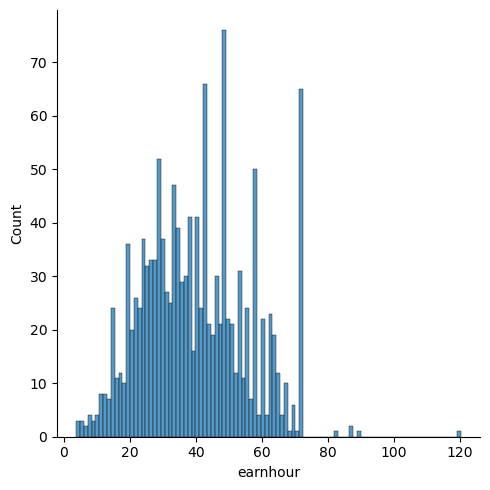

In [246]:
#Check the hourly earnings plot
sns.displot(softdev['earnhour'], bins = 100) #Seems fairly normal,but for some reason a lot of values around 72, and then none till 82
#Needs further checking, but we don't need to change the distribution (for example by taking a log)

5       72.11525
8       72.11525
41      72.11525
119     72.11525
120     72.11525
          ...   
1220    72.11525
1228    72.11525
1234    72.11525
1237    72.11525
1326    72.11525
Name: earnhour, Length: 70, dtype: float64 

        earnhour  uhours
212    81.843750    32.0
287    86.500000    20.0
428    86.538000    20.0
954   120.192083    24.0
1168   89.162963    27.0


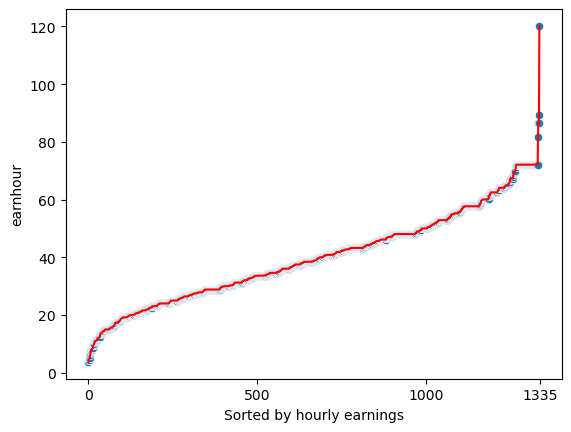

In [248]:
#Check the high values (this way of outputting a part of the dataframe works and is very useful, would recommend, much simpler than using df.loc, any DF can take a boolean dataframe input)
print(softdev[softdev['earnhour'] > 72] ['earnhour'], '\n')
print(softdev[softdev['earnhour'] > 73] [['earnhour', 'uhours']])

sorted = softdev.sort_values(by=['earnhour']).reset_index(drop=True)
sns.scatterplot( data=sorted, y="earnhour",x = sorted.index, alpha = 1)
plt.plot(sorted.index, sorted["earnhour"], color = 'red')
plt.xlabel("Sorted by hourly earnings")
plt.xticks([0,500,1000,len(sorted)]);

#### We see the value 72.11525 very often in the data, those are who work 40hrs/w and earn 2884.61/w. This seems first surprising since it is not a round number, but it means 150k/yr, so not surprising. Higher values than that: the better hourly earners actually work less hours per week. Therefore, this is an important indicator.

Some plots to see indicators importance:

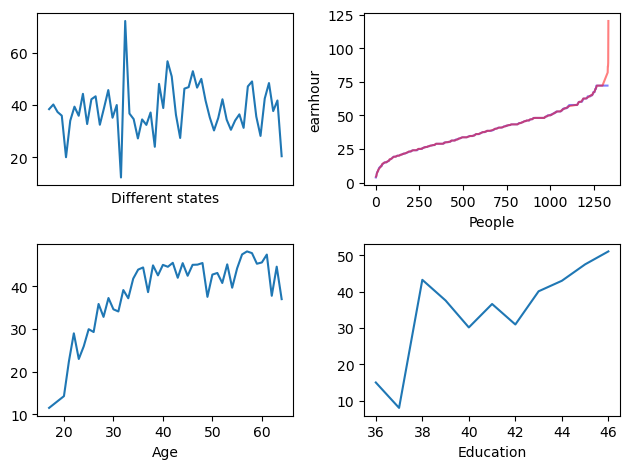

In [249]:
fig, axes = plt.subplots(2, 2)

axes[0,0].plot(sorted.groupby('state')["earnhour"].mean()) # State: Important
axes[0,0].set_xlabel('Different states')
axes[0,0].set_xticks([])

sorted_male = (sorted[sorted["sex"]==1]); sorted_female=(sorted[sorted["sex"]==2]) 
sns.lineplot( data=sorted_male, y="earnhour",x = sorted_male.index, ax=axes[0, 1], color = 'blue', alpha = 0.5)
sns.lineplot(data=sorted_female, y="earnhour",x = sorted_female.index, ax=axes[0, 1], color = 'red',alpha = 0.5)
axes[0,1].set_yticks([0,25,50,75,100,125,])  # Gender: not important
axes[0,1].set_xlabel('People')

axes[1,0].plot(sorted.groupby('age')["earnhour"].mean()) # Important
axes[1,0].set_xlabel('Age')

axes[1,1].plot(sorted.groupby('grade92')["earnhour"].mean())  # Somewhat important
axes[1,1].set_xlabel('Education')

fig.tight_layout()


In [250]:
# Turn categorical variable into numerical, but to do it in a logical way, assert values in an increasing mean order

qf =(sorted.groupby('state')["earnhour"].mean()).sort_values()
sorted["state"] = softdev["state"].replace(qf.index, range(0, len(qf.index)))
qf =(sorted.groupby('ind02')["earnhour"].mean()).sort_values()
sorted["ind02"] = softdev["ind02"].replace(qf.index, range(0, len(qf.index)))
qf =(sorted.groupby('prcitshp')["earnhour"].mean()).sort_values()
sorted["prcitshp"] = softdev["prcitshp"].replace(qf.index, range(0, len(qf.index)));
sorted


,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,earnhour
0,80022.0,2.985026e+13,4,CA,2738.8316,150.00,40.0,44.0,4.0,NaN,...,4.0,3,52,50,1020.0,"Private, Nonprofit",No,No,Employed-At Work,3.750000
1,170019.0,7.670979e+14,7,MN,1849.9417,175.00,40.0,40.0,1.0,NaN,...,0.0,3,52,97,1020.0,"Private, For Profit",No,No,Employed-At Work,4.375000
2,94818.0,9.601580e+14,4,NM,1649.4561,180.76,40.0,44.0,1.0,8.0,...,0.0,1,52,50,1020.0,Government - Federal,No,No,Employed-At Work,4.519000
3,168172.0,1.203079e+14,7,ME,559.4847,250.00,50.0,43.0,1.0,NaN,...,2.0,1,45,33,1020.0,"Private, For Profit",No,No,Employed-At Work,5.000000
4,126787.0,8.494801e+13,5,TX,3630.8955,230.00,45.0,43.0,1.0,NaN,...,0.0,1,45,91,1020.0,"Private, For Profit",No,No,Employed-At Work,5.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,54157.0,1.130917e+14,3,CA,2828.1036,2619.00,32.0,44.0,1.0,NaN,...,8.0,2,44,99,1020.0,"Private, For Profit",No,No,Employed-At Work,81.843750
1331,68537.0,6.059091e+14,3,NJ,2536.7105,1730.00,20.0,43.0,1.0,8.0,...,4.0,1,44,95,1020.0,"Private, For Profit",No,No,Employed-Absent,86.500000
1332,103651.0,3.069058e+14,4,WA,2640.0434,1730.76,20.0,43.0,1.0,NaN,...,0.0,2,44,50,1020.0,"Private, For Profit",No,No,Employed-At Work,86.538000
1333,278705.0,1.100083e+14,11,NH,774.4410,2407.40,27.0,43.0,1.0,NaN,...,5.0,1,28,78,1020.0,"Private, For Profit",No,No,Employed-At Work,89.162963


## Predict: Earnings per hour based on attributes

In [273]:
y = 'earnhour'

#All models are OLS
#Model 1: Simplest
X1 = "age+state+uhours"
reg1 = smf.ols(formula=y+"~"+X1, data=sorted).fit()

#Model 2
X2 = X1+"+grade92+ind02+marital"
reg2 = smf.ols(formula=y+"~"+X2, data=sorted).fit()

#Model 3
X3 = X2+"+ownchild+chldpres+prcitshp+race"
reg3 = smf.ols(formula=y+"~"+X3, data=sorted).fit()

#Model 4
X4 = X3 +"+intmonth"
reg4 = smf.ols(formula=y+"~"+X4, data=sorted).fit()



## Model Performance
a) RMSE
b) CV RMSE
c) BIC

In [288]:
import statsmodels.tools
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# BIC
print("BIC1: ", reg1.bic, "\nBIC2: ", reg2.bic, "\nBIC3: ", reg3.bic, "\nBIC4: ", reg4.bic, "\n")

# RMSE
rmse1=statsmodels.tools.eval_measures.rmse(reg1.predict(sorted[X1.split("+")]), sorted[y])
rmse2=statsmodels.tools.eval_measures.rmse(reg2.predict(sorted[X2.split("+")]), sorted[y])
rmse3=statsmodels.tools.eval_measures.rmse(reg3.predict(sorted[X3.split("+")]), sorted[y])
rmse4=statsmodels.tools.eval_measures.rmse(reg4.predict(sorted[X4.split("+")]), sorted[y])
print("RMSE1: ", rmse1, "\nRMSE2: ", rmse2, "\nRMSE3: ", rmse3, "\nRMSE4: ", rmse4, "\n")


# CV RMSE
from sklearn.linear_model import LinearRegression #Get the same results as with statsmodels, and sklearn has a built in CV function

X1t = sorted[X1.split("+")]; X2t = sorted[X2.split("+")]; X3t = sorted[X3.split("+")]; X4t = sorted[X4.split("+")]; yt = sorted[y]
reg1cv = LinearRegression().fit(X1t, yt); reg2cv = LinearRegression().fit(X2t, yt); reg3cv = LinearRegression().fit(X3t, yt); reg4cv = LinearRegression().fit(X4t, yt)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(reg1cv, X1t, yt, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1); scores2 = cross_val_score(reg2cv, X2t, yt, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1); scores3 = cross_val_score(reg3cv, X3t, yt, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1); scores4 = cross_val_score(reg4cv, X4t, yt, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1)
print("CV RMSE 1:", np.mean(np.sqrt(np.abs(scores1))), "\nCV RMSE 2:", np.mean(np.sqrt(np.abs(scores2))), "\nCV RMSE 3:", np.mean(np.sqrt(np.abs(scores3))), "\nCV RMSE 4:", np.mean(np.sqrt(np.abs(scores4))))


BIC1:  11108.664336662569 
BIC2:  11028.974936754978 
BIC3:  11035.441128797736 
BIC4:  11041.728505938836 

RMSE1:  15.345593349007556 
RMSE2:  14.774400286137185 
RMSE3:  14.651404696037373 
RMSE4:  14.646415785142851 

CV RMSE 1: 15.397261490916827 
CV RMSE 2: 14.843137242839575 
CV RMSE 3: 14.751761802538018 
CV RMSE 4: 14.750188686252717


## Results, visualizations, and discussion

As we are not splitting the data into a train and test set, RMSE which works on the same idea as the OLS, is continously decreasing as we add more variables and would keep doing it, minimalizing squared error in a higher dimension. If we were to train the data on a cross-validated training set, then use the test set for evaluation (predicting test target variable values based on test input variable values), we would notice that the accuracy can drop as the model gets more complex, and this is what the CV RMSE would recommend in that case. This is because we're overfitting the data on the more complex models (a proof of this is above, how the gender distinction is not significant in the data, but it is in the model). Bayesian information criterion (BIC) is a better evaluatior here because of this. See how it from the 2nd model, the BIC values keep increasing as it penalizes the model for complexity, thus one of the simpler models is "the best". The first model is not complex enough, but all models generally don't do as well as maybe expected. This is because dependencies are nowhere linear. See below for a visualization of the hourly payrate varies under the condition of the input data in case of the first regression model.

Choice of columns is further described in the .pdf file.

c:\Users\hanic\anaconda3\envs\work\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\hanic\anaconda3\envs\work\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\hanic\anaconda3\envs\work\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will

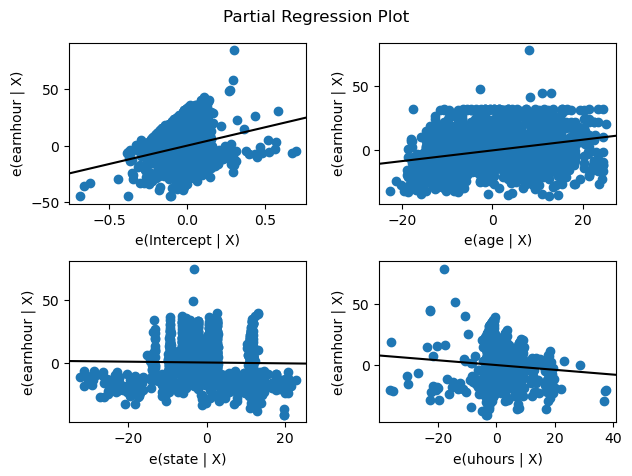

In [286]:
fig = sm.graphics.plot_partregress_grid(reg1)
fig.tight_layout(pad=1.0)